In [287]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd
import seaborn as sns
import numpy as np




In [288]:

# Replace 'file_path.csv' with the path to your CSV file
file_path = './measurements_python.csv' #'measurementshaskell.csv'

# Read the CSV file into a pandas DataFrame
df310 = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df310.head())


  Language     Program  PowerLimit     Package        Core GPU DRAM   Time  \
0   Python   chameleon          -1  416.231750  369.447876           17751   
1   Python   chameleon          -1  406.150635  362.666504           17516   
2   Python   chameleon          -1  403.458496  360.269714           17474   
3   Python   chameleon          -1  406.172363  362.136658           17466   
4   Python   chameleon          -1  404.590515  363.036011           17408   

   Temperature  Memory  
0         53.6   43820  
1         54.0   43780  
2         53.6   43796  
3         52.4   43532  
4         53.3   43700  


In [289]:

# Replace 'file_path.csv' with the path to your CSV file
file_path = './measurements_python36.csv' #'measurementshaskell.csv'

# Read the CSV file into a pandas DataFrame
df36 = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df36.head())


   Language     Program  PowerLimit     Package        Core GPU DRAM   Time  \
0  Python36   chameleon          -1  152.581360  103.898071           21116   
1  Python36   chameleon          -1  153.161560  103.377258           21169   
2  Python36   chameleon          -1  154.081665  103.039307           21272   
3  Python36   chameleon          -1  150.564575  102.911194           21054   
4  Python36   chameleon          -1  153.234558  102.084778           21405   

   Temperature  Memory  
0         34.7   45664  
1         35.8   45416  
2         36.9   45664  
3         37.5   45412  
4         37.6   45232  


In [290]:
def remove_outliers(group):
    sorted_group = group.sort_values(by='Package')
    return sorted_group.iloc[2:-2]

# Group by 'Program' and 'PowerLimit' and apply the function to remove outliers
df36 = df36.groupby(['Program', 'PowerLimit']).apply(remove_outliers).reset_index(drop=True)

# Display the cleaned DataFrame
print(df36)

# Group by 'Program' and 'PowerLimit' and apply the function to remove outliers
df310 = df310.groupby(['Program', 'PowerLimit']).apply(remove_outliers).reset_index(drop=True)

# Display the cleaned DataFrame
print(df310)


     Language        Program  PowerLimit     Package        Core GPU DRAM  \
0    Python36           2to3          -1  294.061768  194.643860            
1    Python36           2to3          -1  294.857422  195.480835            
2    Python36           2to3          -1  294.887878  195.103821            
3    Python36           2to3          -1  297.669617  195.020325            
4    Python36           2to3          -1  298.853455  194.375549            
..        ...            ...         ...         ...         ...  ..  ...   
125  Python36   tornado_http           5  161.519836   84.235474            
126  Python36   tornado_http           5  161.894104   83.250305            
127  Python36   tornado_http           5  162.771545   84.002808            
128  Python36   tornado_http           5  162.971680   83.115906            
129  Python36   tornado_http           5  163.166565   83.380798            

      Time  Temperature  Memory  
0    41729         43.1   45592  
1    41

In [291]:
df36.shape

(130, 10)

In [292]:
df310 = df310[df310['PowerLimit'].isin([-1, 5])]

df310.shape

(120, 10)

In [293]:
df310 = df310.drop(['GPU', 'DRAM', 'Language'], axis=1)
df36 = df36.drop(['GPU', 'DRAM', 'Language'], axis=1)

print("df310 types:")
print(df310.dtypes)

print("\ndf36 types:")
print(df36.dtypes)

df310 types:
Program         object
PowerLimit       int64
Package        float64
Core           float64
Time             int64
Temperature    float64
Memory           int64
dtype: object

df36 types:
Program         object
PowerLimit       int64
Package        float64
Core           float64
Time             int64
Temperature    float64
Memory           int64
dtype: object


In [294]:
df310_mean = df310.groupby(['Program', 'PowerLimit']).mean().reset_index()

df310_mean.shape

(20, 7)

In [295]:
df36_mean = df36.groupby(['Program', 'PowerLimit']).mean().reset_index()

df36_mean.shape

(20, 7)

In [296]:
df36_mean['Time'] = df36_mean['Time'] / 1000 
df310_mean['Time'] = df310_mean['Time'] / 1000 

df36_mean['Memory'] = df36_mean['Memory'] / 1000 
df310_mean['Memory'] = df310_mean['Memory'] / 1000 


In [297]:
df310_mean.shape


(20, 7)

In [298]:
df310_mean = df310_mean.drop(columns = ['Program']).groupby(['PowerLimit']).mean().reset_index()

df310_mean

,PowerLimit,Package,Core,Time,Temperature,Memory
0,-1,751.311451,657.299815,33.448583,53.856667,52.329133
1,5,378.331167,193.891218,75.643617,38.390000,52.337533


In [299]:
df36_mean = df36_mean.drop(columns = ['Program']).groupby(['PowerLimit']).mean().reset_index()

df36_mean

,PowerLimit,Package,Core,Time,Temperature,Memory
0,-1,418.318221,266.445597,59.878356,42.014375,53.838042
1,5,402.315726,206.265395,79.895583,42.401667,54.040200


In [300]:
# Add an identifier column to each DataFrame
df36_mean['Versão Python'] = 'Python 3.6'
df310_mean['Versão Python'] = 'Python 3.10'

# Combine the DataFrames
combined_df = pd.concat([df36_mean, df310_mean])

combined_df.shape



(4, 7)

In [301]:
combined_df.head()

,PowerLimit,Package,Core,Time,Temperature,Memory,Versão Python
0,-1,418.318221,266.445597,59.878356,42.014375,53.838042,Python 3.6
1,5,402.315726,206.265395,79.895583,42.401667,54.040200,Python 3.6
0,-1,751.311451,657.299815,33.448583,53.856667,52.329133,Python 3.10
1,5,378.331167,193.891218,75.643617,38.390000,52.337533,Python 3.10


In [302]:
grouped_df = combined_df.groupby(['PowerLimit', 'Versão Python']).sum().reset_index()

grouped_df

,PowerLimit,Versão Python,Package,Core,Time,Temperature,Memory
0,-1,Python 3.10,751.311451,657.299815,33.448583,53.856667,52.329133
1,-1,Python 3.6,418.318221,266.445597,59.878356,42.014375,53.838042
2,5,Python 3.10,378.331167,193.891218,75.643617,38.390000,52.337533
3,5,Python 3.6,402.315726,206.265395,79.895583,42.401667,54.040200


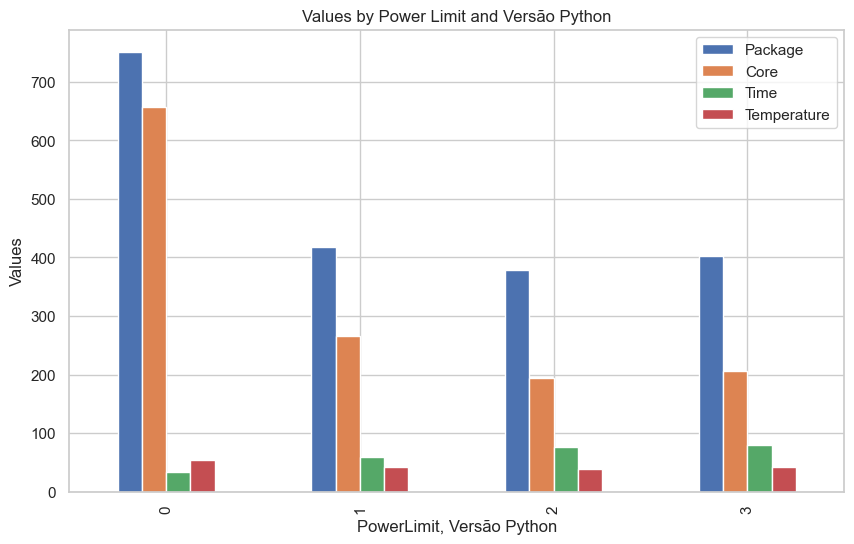

In [303]:


# Grouped DataFrame
#grouped_df = grouped_df.groupby(['PowerLimit', 'DataFrame']).mean()

# Extracting required columns
columns = ['Package', 'Core', 'Time', 'Temperature']
data = grouped_df[columns]

# Plotting the bar graph
data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('PowerLimit, Versão Python')
plt.ylabel('Values')
plt.title('Values by Power Limit and Versão Python')
plt.legend(loc='upper right')
plt.show()

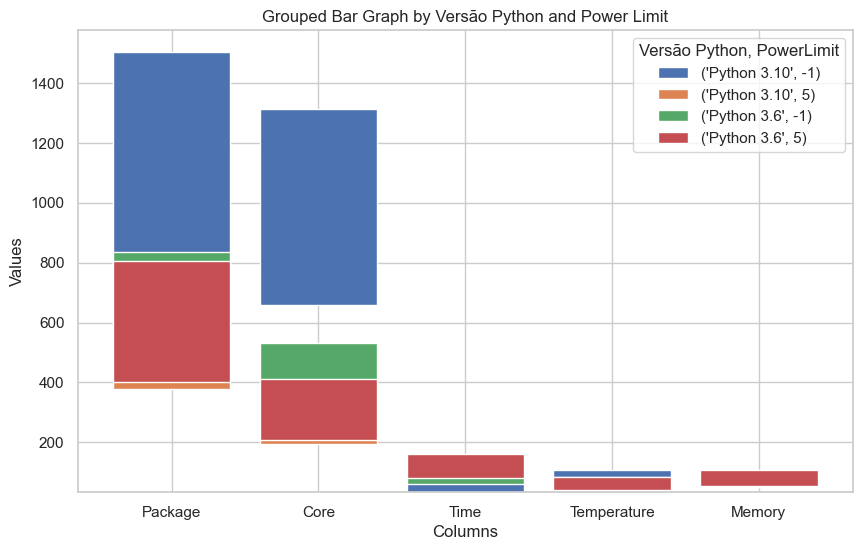

In [304]:
# Reshape the DataFrame to a long format
melted_df = combined_df.melt(id_vars=['PowerLimit', 'Versão Python'], var_name='Column', value_name='Value')

melted_df.head()

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
for key, grp in melted_df.groupby(['Versão Python', 'PowerLimit']):
    ax.bar(grp['Column'], grp['Value'], label=f"{key}", bottom=grp['Value'])

ax.set_xlabel('Columns')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Graph by Versão Python and Power Limit')
ax.legend(title=('Versão Python, PowerLimit'), loc='upper right')

plt.show()

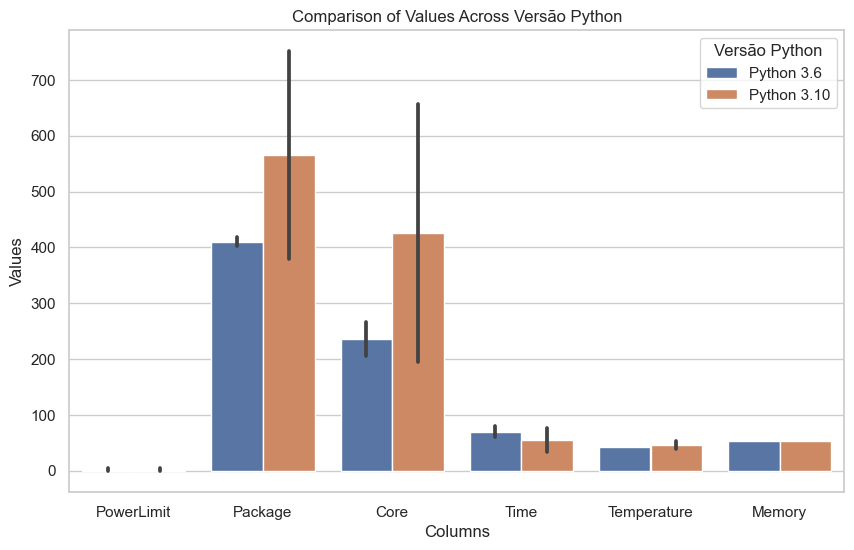

In [305]:
# Melt the combined DataFrame
melted_df = pd.melt(combined_df, id_vars='Versão Python', var_name='Columns', value_name='Values')


# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Columns', y='Values', hue='Versão Python', data=melted_df)

# Add title and labels
plt.title('Comparison of Values Across Versão Python')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()